# Titanic Exploratory data analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading data set
titan = pd.read_csv('titanic_train.csv')

In [4]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing data

In [5]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

since cabin column has a lot of missing value so dropping the column now.
For age column imputation can be done after further analysis

In [43]:
# drop the cabin column
titan.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

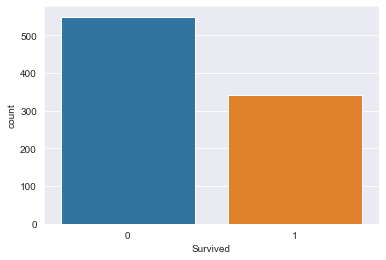

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train)

In [19]:
# to find out the color palette of sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='Survived', ylabel='count'>

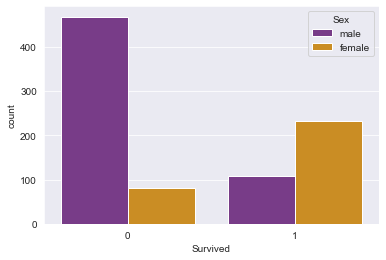

In [20]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='CMRmap')

<AxesSubplot:xlabel='Survived', ylabel='count'>

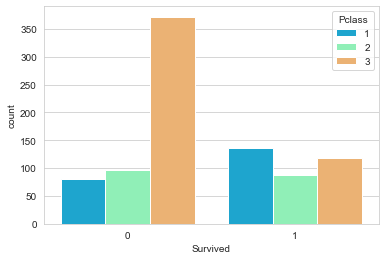

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titan,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Count'>

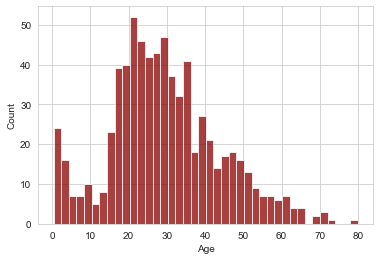

In [27]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=40) #it has not actually dropped the na values in age column

In [30]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

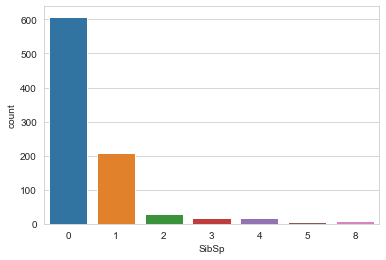

In [34]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

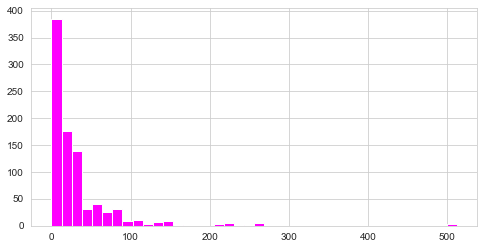

In [36]:
train['Fare'].hist(color='magenta',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

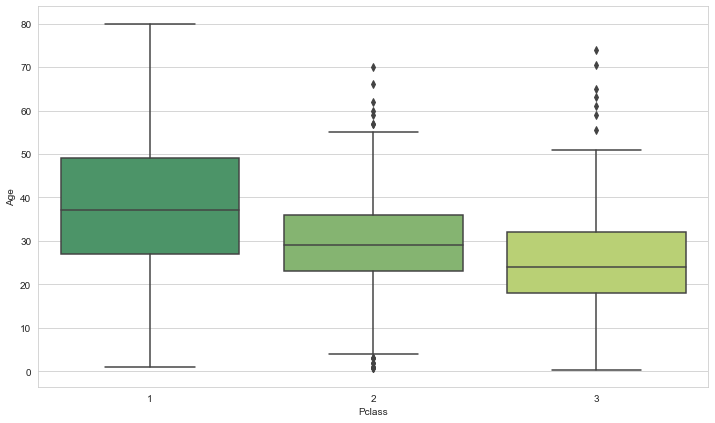

In [37]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

We can see that passengers in pclass 1 is older than Pclass 2 and passengers in pclass 2is older than Pclass 3 so on We can use these average age values to impute based on Pclass for Age.

## Data Cleaning
we have age column with missing values and we can fill it with the mean value of age column but a relationship was found between age and P class so using this will give us better imputation value

In [38]:
# creating an impute function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [41]:
titan['Age'] = titan[['Age','Pclass']].apply(impute_age,axis=1)

In [46]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
titan.dropna(inplace=True)

Now we don't have any missing values

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [48]:
sex = pd.get_dummies(titan['Sex'],drop_first=True)
embark = pd.get_dummies(titan['Embarked'],drop_first=True)

#### Dropping the column which has been changed or not required

In [50]:
titan.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [52]:
titan.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [53]:
# adding the dummies column to the data set
titan = pd.concat([titan,sex,embark],axis=1)

In [54]:
titan.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### Separating the features and labels as x AND Y

In [55]:
y=titan['Survived']

In [56]:
x=titan.drop('Survived',axis=1)

In [57]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Train test split

In [59]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=100)

### Training and predicting

In [61]:
from sklearn.linear_model import LogisticRegression

In [66]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)

C:\Users\afshan.hashmi.TOP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
predictions = lrmodel.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix


In [69]:
accuracy=confusion_matrix(y_test,predictions)

In [70]:
accuracy

array([[142,  18],
       [ 46,  61]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7602996254681648

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       160
           1       0.77      0.57      0.66       107

    accuracy                           0.76       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.76      0.76      0.75       267

